In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
df = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df = df.iloc[:,2:]

In [9]:
df.head()

,Age,EstimatedSalary,Purchased
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0


In [10]:
X = df.drop(columns=["Purchased"])
y = df.iloc[:,-1:]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()

In [18]:
model.add(Dense(128,input_dim=2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [21]:
record = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5450 - loss: 746.2284 - val_accuracy: 0.6250 - val_loss: 77.0307
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5123 - loss: 76.8474 - val_accuracy: 0.3750 - val_loss: 123.1761
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4589 - loss: 75.8650 - val_accuracy: 0.3750 - val_loss: 2.4339
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4898 - loss: 46.8796 - val_accuracy: 0.3750 - val_loss: 91.9215
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4916 - loss: 69.4126 - val_accuracy: 0.6250 - val_loss: 97.8290
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5957 - loss: 85.2844 - val_accuracy: 0.6250 - val_loss: 141.2629
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5280 - loss: 111.9280 - val_accuracy: 0.6250 - val_loss: 125.3881
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5674 - loss: 73.9727 - val_

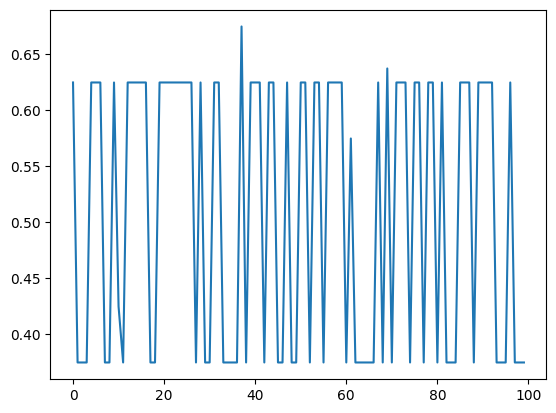

In [22]:
import matplotlib.pyplot as plt
plt.plot(record.history["val_accuracy"])

**After Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

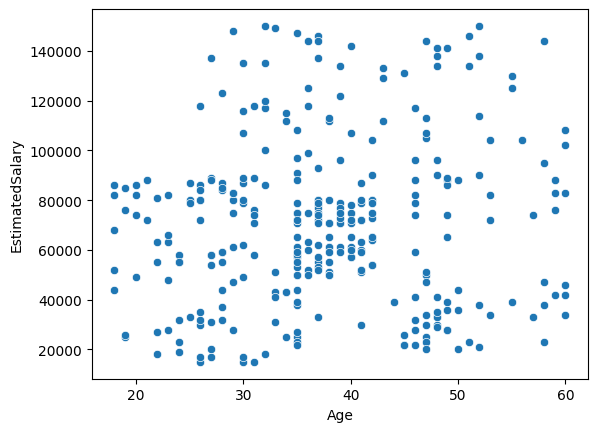

In [53]:
sns.scatterplot(x=X_train.iloc[:,0],y=X_train.iloc[:,1])

<Axes: >

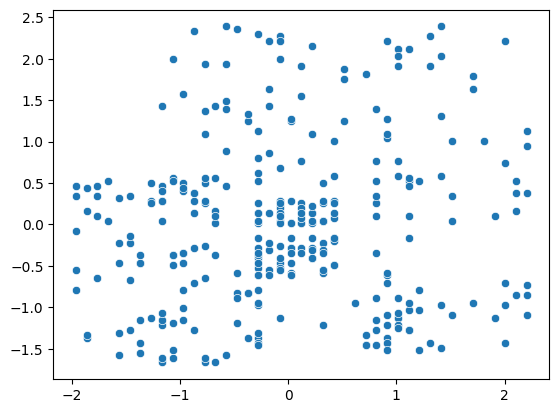

In [54]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [31]:
model2 = Sequential()
model2.add(Dense(128,input_dim=2,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [36]:
new_record = model2.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7056 - loss: 0.6426 - val_accuracy: 0.6250 - val_loss: 1070.1376
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7787 - loss: 0.5949 - val_accuracy: 0.3750 - val_loss: 1971.2930
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7848 - loss: 0.5620 - val_accuracy: 0.3750 - val_loss: 5173.0820
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8455 - loss: 0.5217 - val_accuracy: 0.3750 - val_loss: 8427.3848
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8268 - loss: 0.4851 - val_accuracy: 0.3750 - val_loss: 10955.3018
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8173 - loss: 0.4701 - val_accuracy: 0.3750 - val_loss: 13406.7539
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8225 - loss: 0.4497 - val_accuracy: 0.3750 - val_loss: 15730.5986
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8810 - loss: 0.4163 -

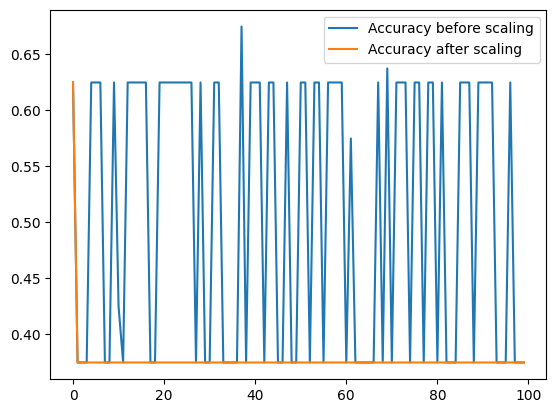

In [41]:
import matplotlib.pyplot as plt
plt.plot(record.history["val_accuracy"],label="Accuracy before scaling")
plt.plot(new_record.history["val_accuracy"],label="Accuracy after scaling ")
plt.legend()
plt.show()